<figure>
 <img src="test.jpg" width="480" alt="Color Selected Image" />
 <p/>
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> **Finding lane lines:** Use the code below identify the lane lines in this image.</p> 
 </figcaption>
</figure>

---

Coding up a Color Selection
===

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


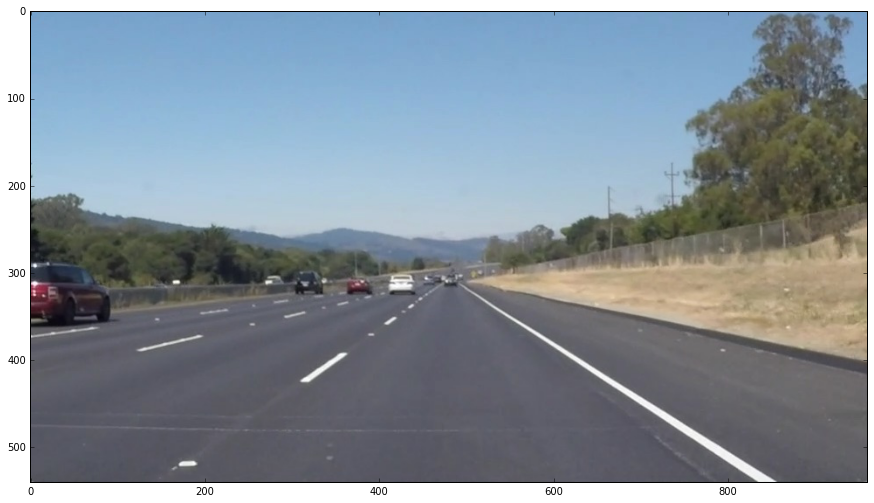

In [28]:
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import numpy as np
from PIL import Image
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 15)

#image = mpimg.imread('test.jpg')
image = np.asarray(Image.open('./solidWhiteRight.jpg'))
print('This image is: ',type(image), 
         'with dimensions:', image.shape)
ysize = image.shape[0]
xsize = image.shape[1]

plt.imshow(image)
# fig = plt.gcf()
# fig.canvas.manager.window.raise_()

**Play with the color selection (modify “redCut, greenCut, blueCut”) until you are able to retain as much of the lines as possible, while getting rid of most of the other stuff.  Check that your output "colorSel" looks roughly like the example image in the lesson.**


In [1]:
colorSelect = np.copy(image)

redThreshold = 200
greenThreshold = 200
blueThreshold = 200
rgbThreshold = [redThreshold, greenThreshold, blueThreshold]

for xpos in range(xsize):
    for ypos in range(ysize):
        red = image[ypos, xpos, 0]
        green = image[ypos, xpos, 1]
        blue = image[ypos, xpos, 2]
        if red < rgbThreshold[0] or green <  rgbThreshold[1] or blue < rgbThreshold[2]:
            colorSelect[ypos, xpos, :] = [0, 0, 0]

plt.imshow(colorSelect)
# fig = plt.gcf()
# fig.canvas.manager.window.raise_()

NameError: name 'np' is not defined

<figure>
 <img src="color_selected.jpg" width="480" alt="Color Selected Image" />
 <p/>
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output image should look approximately like this after color selection and region masking </p> 
 </figcaption>
</figure>

---

Coding up a Region of Interest Mask
===

** Now try to mask out everything but the region of interest in the image (where the lane lines are).  Play around with the variables "leftBottom", "rightBottom", and "apex" until your triangular mask looks similar to the example image below. Note that the y axis goes from 0 at the top, to 539 at the bottom of the image.**

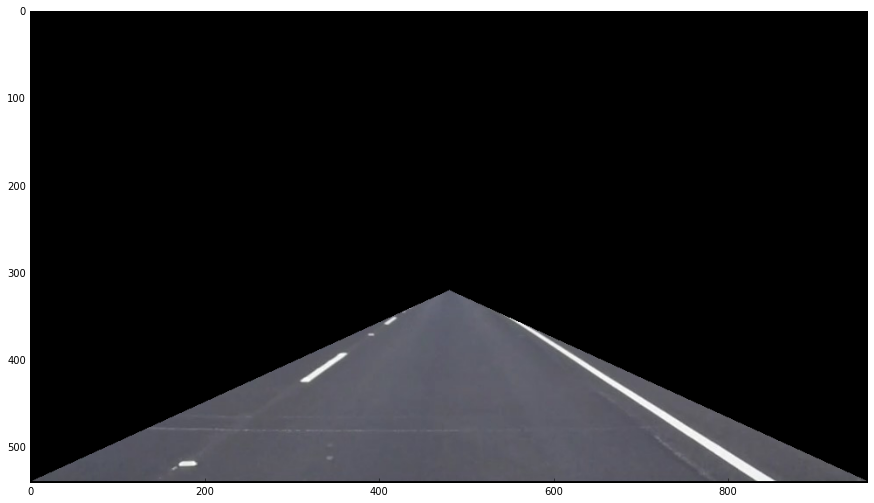

In [35]:
regionSelect = np.copy(image)

#defining a triangle region of interest
leftBottom = [0,539]
rightBottom = [960,539]
apex = [480,320]


fitLeft = np.polyfit((leftBottom[0], apex[0]), (leftBottom[1], apex[1]), 1)
fitRight = np.polyfit((rightBottom[0], apex[0]), (rightBottom[1], apex[1]), 1)
fitBottom = np.polyfit((leftBottom[0], rightBottom[0]), (leftBottom[1], rightBottom[1]), 1)

for xpos in range(xsize):
    for ypos in range(ysize):
        if ypos < (fitLeft[0]*xpos + fitLeft[1]) or ypos < (fitRight[0]*xpos + fitRight[1]) or ypos > (fitBottom[0]*xpos + fitBottom[1]):
            regionSelect[ypos, xpos, :] = [0, 0, 0]

plt.imshow(regionSelect)
# fig = plt.gcf()
# fig.canvas.manager.window.raise_()

<figure>
 <img src="masked.jpg" width="480" alt="Color Selected Image" />
 <p/>
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output image should look approximately like this after region masking </p> 
 </figcaption>
</figure>

---

Combining Color and Region Selections
===

**Now lets combine the mask and color selection to get only the lane lines out of the image.**  

**Check out the code below.  Here we’re doing both steps in the same nested for loop, requiring that a pixel meet both the mask and color selection requirements to be retained.**

**Your color selection plus mask should now look like the first  sample image.  We also painted the lines back onto our original image to see how they look.  Compare your result with the second sample image.**

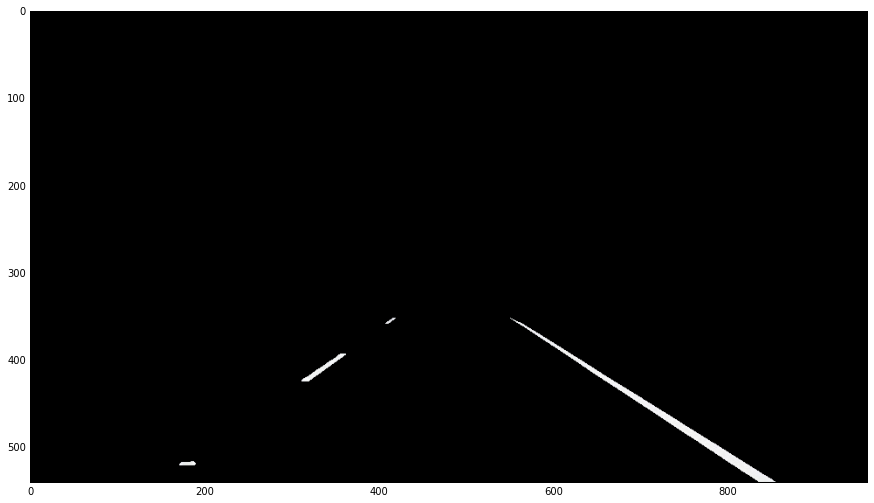

In [36]:
colorSelect = np.copy(image)
lineImage = np.copy(image)

for xpos in range(xsize):
    for ypos in range(ysize):
        red = image[ypos, xpos, 0]
        green = image[ypos, xpos, 1]
        blue = image[ypos, xpos, 2]
        if red < rgbThreshold[0] or green <  rgbThreshold[1] or blue < rgbThreshold[2]:
            colorSelect[ypos, xpos, :] = [0, 0, 0]
        elif ypos < (fitLeft[0]*xpos + fitLeft[1]) or ypos < (fitRight[0]*xpos + fitRight[1]):
            colorSelect[ypos, xpos, :] = [0, 0, 0]
        else: 
            lineImage[ypos, xpos, :] = [255, 0, 0]

plt.imshow(colorSelect)

<figure>
 <img src="color_roi_sel.png" width="480" alt="Color Selected Image" />
 <p/>
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output image should look approximately like this after color selection and region masking </p> 
 </figcaption>
</figure>

---

**Run the cell below to paint the lines on the road**

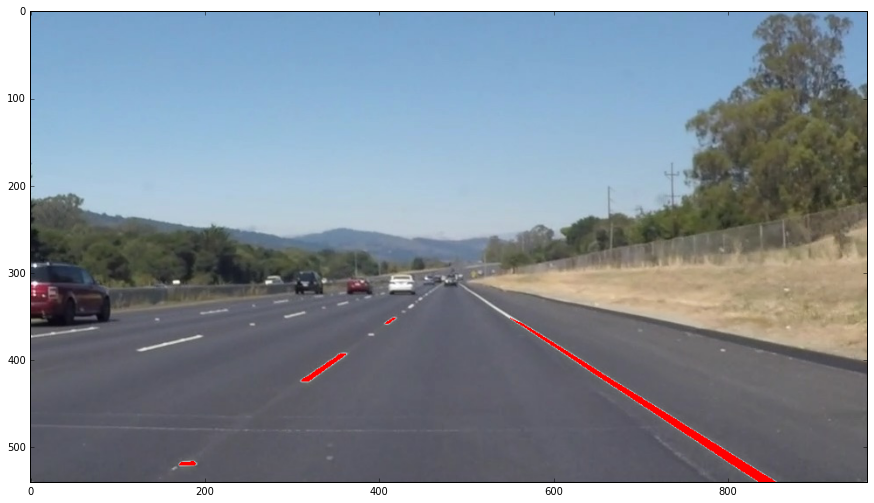

In [37]:
plt.imshow(lineImage)
# fig = plt.gcf()
# fig.canvas.manager.window.raise_()

<figure>
 <img src="redLines.png" width="480" alt="Color Selected Image" />
 <p/>
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output image should look approximately like this after color selection and region masking </p> 
 </figcaption>
</figure>

---

Canny Edge Detection in Action
===

**Read in the image below and play with the parameters to detect edges using Canny**  

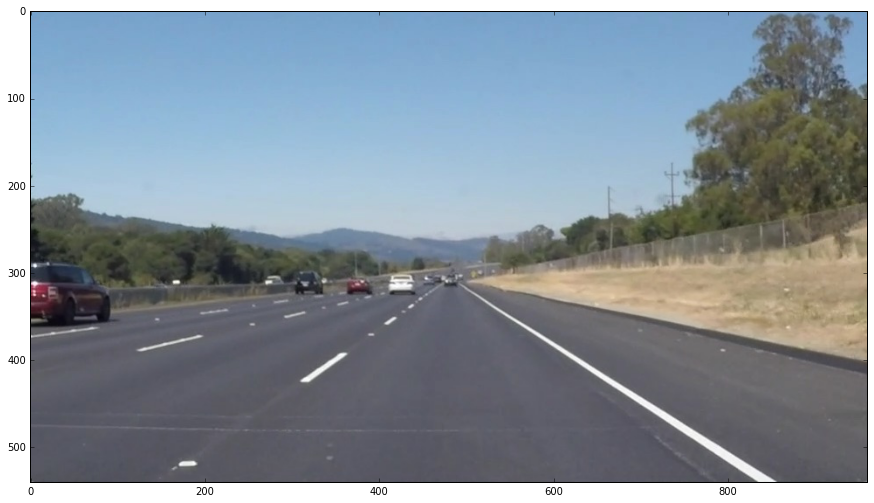

In [38]:
import cv2

image = np.asarray(Image.open('./solidWhiteRight.jpg'))
plt.imshow(image)
# fig = plt.gcf()
# fig.canvas.manager.window.raise_()

<figure>
 <img src="mountain_road.jpg" width="480" alt="Color Selected Image" />
 <p/>
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> </p> 
 </figcaption>
</figure>

---

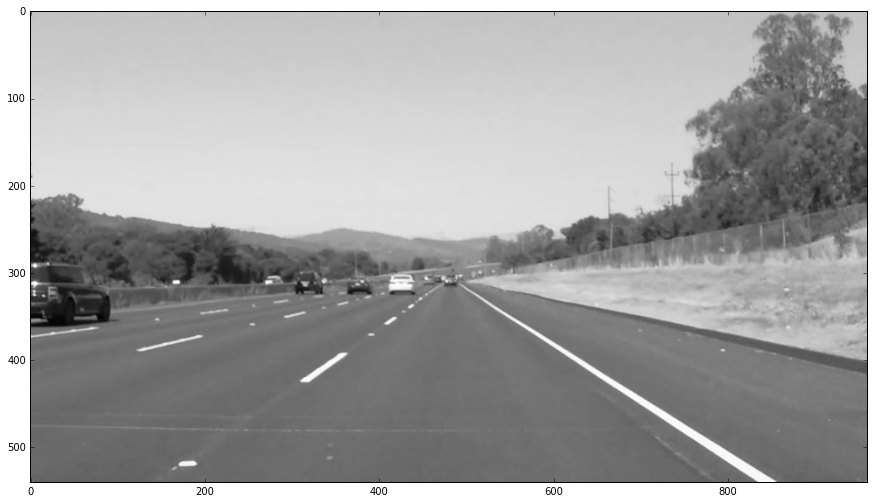

In [45]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='Greys_r')

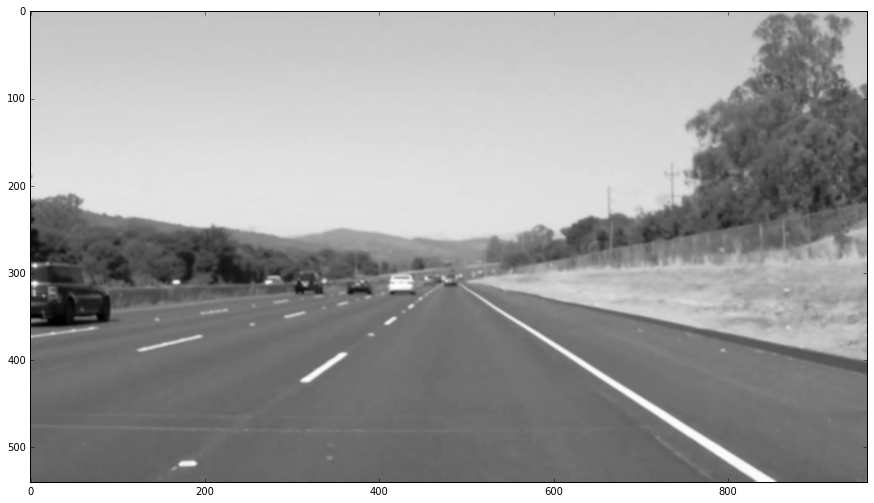

In [60]:
kernelSize = 5
blurGray = cv2.GaussianBlur(gray,(kernelSize, kernelSize), 0)
plt.imshow(blurGray, cmap='Greys_r')

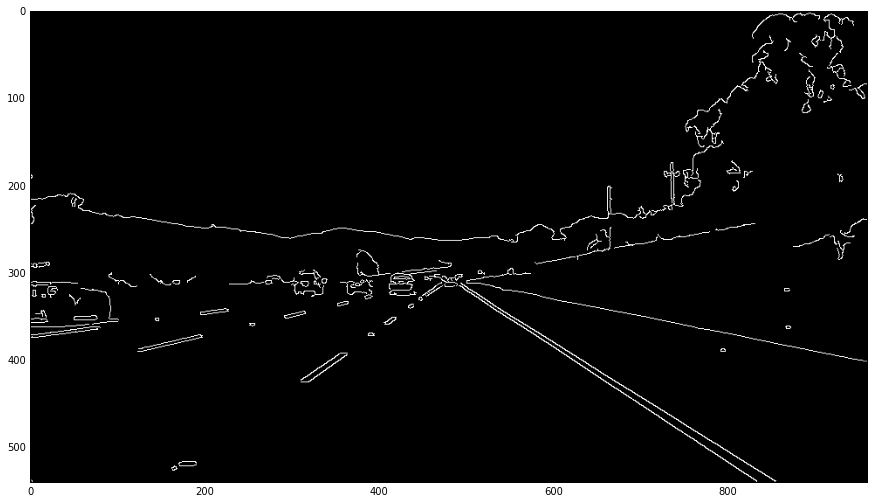

In [61]:
lowThreshold = 50
highThreshold = 150
apSize = 3
edges = cv2.Canny(blurGray, lowThreshold, highThreshold, apertureSize = apSize)

plt.imshow(edges, cmap='Greys_r')

<figure>
 <img src="edgymountain.jpg" width="480" alt="Color Selected Image" />
 <p/>
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output image should look approximately like this after edge detection </p> 
 </figcaption>
</figure>

---

Implementing a Hough Transform on Edge Detected Image
===

**Play with the parameteres for the Hough Transform to find lines below**

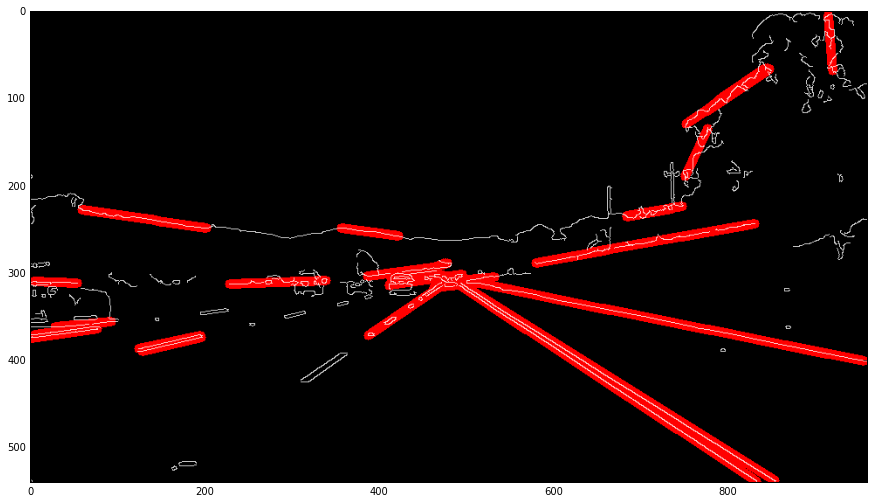

In [69]:
#the Hough transform takes various parameters
#see the links above to learn more about what they do.
rho = 1
theta = np.pi/90
threshold = 30
minLineLength = 50
maxLineGap = 15
lineImage = np.copy(image)*0 #creating a blank to draw lines on

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            minLineLength, maxLineGap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(lineImage,(x1,y1),(x2,y2),(255,0,0),10)

colorEdges = np.dstack((edges, edges, edges))
combo = cv2.addWeighted(colorEdges, 0.8, lineImage, 1, 0)


plt.imshow(combo)

<figure>
 <img src="hough_mountain.jpg" width="480" alt="Color Selected Image" />
 <p/>
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output image should look approximately like this after line detection </p> 
 </figcaption>
</figure>

---